In [507]:
# package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from re import sub
from sklearn.preprocessing import StandardScaler
from pandasql import sqldf

# Task

In [508]:
A=pd.read_csv("C:/Users/91973/Downloads/application_record.csv")
B=pd.read_csv("C:/Users/91973/Downloads/credit_record.csv")

application_record.csv



Feature name  <<++++++++>>   Explanation


ID	--------------------Client number	
CODE_GENDER	------------Gender	
FLAG_OWN_CAR----------	Is there a car	
FLAG_OWN_REALTY	--------Is there a property	
CNT_CHILDREN	--------Number of children	
AMT_INCOME_TOTAL--------Annual income	
NAME_INCOME_TYPE--------Income category	
NAME_EDUCATION_TYPE-----Education level	
NAME_FAMILY_STATUS------Marital status	
NAME_HOUSING_TYPE	----Way of living	
DAYS_BIRTH	Birthday---	Count backwards from current day (0), -1 means yesterday
DAYS_EMPLOYED--------	Start date of employment	Count backwards from current day(0). If positive, it means the person                           currently unemployed.
FLAG_MOBIL	------------Is there a mobile phone	
FLAG_WORK_PHONE--------	Is there a work phone	
FLAG_PHONE-----------	Is there a phone	
FLAG_EMAIL-----------	Is there an email	
OCCUPATION_TYPE------	Occupation	
CNT_FAM_MEMBERS	--------Family size

In [509]:
A.drop(labels=['OCCUPATION_TYPE','DAYS_BIRTH'],axis=1,inplace=True)

In [510]:
A.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,1.0


In [511]:
B.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [512]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  CNT_FAM_MEMBERS  

In [513]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [514]:
B.shape

(1048575, 3)

In [515]:
A.shape

(438557, 16)

In [516]:
A.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [517]:
A.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
CNT_FAM_MEMBERS        0
dtype: int64

In [518]:
A=A.drop_duplicates("ID",keep='last')

In [519]:
A.shape

(438510, 16)

In [520]:
B.drop(labels=['MONTHS_BALANCE'],axis=1,inplace=True)

In [521]:
B['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [522]:
out={'X':0,'0':1,'C':0,'1':1,'2':1, '3':1, '4':1, '5':0}

In [523]:
B['STATUS']=B['STATUS'].map(lambda b:out[b])

In [524]:
B['STATUS'].unique()

array([0, 1], dtype=int64)

In [525]:
B["STATUS"].value_counts(normalize=True)*100

0    62.270605
1    37.729395
Name: STATUS, dtype: float64

In [526]:
final_df = pd.merge(A,B, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,2.0,0


In [527]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_EMPLOYED        777715 non-null  int64  
 11  FLAG_MOBIL           777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  CNT_FAM_MEMBERS  

In [528]:
X=final_df.drop(labels=['ID','STATUS'],axis=1)
Y=pd.DataFrame(final_df['STATUS'])

In [529]:
Y.shape

(777715, 1)

In [530]:
X.shape

(777715, 15)

In [531]:
con=[]
cat=[]
for i in X.columns:
    if (X[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [532]:
X[con].head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,0,427500.0,-4542,1,1,0,0,2.0
1,0,427500.0,-4542,1,1,0,0,2.0
2,0,427500.0,-4542,1,1,0,0,2.0
3,0,427500.0,-4542,1,1,0,0,2.0
4,0,427500.0,-4542,1,1,0,0,2.0


In [533]:
X[cat].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
2,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
3,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment
4,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment


In [534]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X1=pd.DataFrame(mm.fit_transform(X[con]),columns=con)

In [535]:
X1.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632
1,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632
2,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632
3,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632
4,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632


In [536]:
X2=pd.get_dummies(X[cat])

In [537]:
X2.head()

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [538]:
XX=X1.join(X2)

In [539]:
XX

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.258721,0.029324,0.0,1.0,0.0,0.0,0.052632,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,0.0,0.055233,0.038115,0.0,0.0,0.0,0.0,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
777711,0.0,0.055233,0.038115,0.0,0.0,0.0,0.0,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
777712,0.0,0.055233,0.038115,0.0,0.0,0.0,0.0,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0
777713,0.0,0.055233,0.038115,0.0,0.0,0.0,0.0,0.000000,0,1,...,0,0,1,0,0,0,0,0,1,0


In [540]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XX,Y,random_state=10)                                                    

In [541]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

C:\Users\91973\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\91973\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Model Accuracy :  61.33601468916674 %

Confusion matrix :
[[119224     22]
 [ 75152     31]]

Classification report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76    119246
           1       0.58      0.00      0.00     75183

    accuracy                           0.61    194429
   macro avg       0.60      0.50      0.38    194429
weighted avg       0.60      0.61      0.47    194429



In [542]:

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=38,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction = decision_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Decision Tree Model Accuracy :  70.59749317231483 %

Confusion matrix :
[[103724  15522]
 [ 41645  33538]]

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78    119246
           1       0.68      0.45      0.54     75183

    accuracy                           0.71    194429
   macro avg       0.70      0.66      0.66    194429
weighted avg       0.70      0.71      0.69    194429



In [543]:
dd=DecisionTreeClassifier()
pred=dd.fit(x_train,y_train)
pred_train=pred.predict(x_train)
pred_test=pred.predict(x_test)


In [544]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_train,y_train)

0.7171507630904908

In [545]:
accuracy_score(pred_test,y_test)

0.7089683123402373

In [546]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=25,
                                            max_depth=38,
                                            min_samples_leaf=10)

RandomForest_model.fit(x_train, y_train)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

<ipython-input-546-b896d9d209c6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(x_train, y_train)


Random Forest Model Accuracy :  70.47816940888447 %

Confusion matrix :
[[103961  15285]
 [ 42114  33069]]

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78    119246
           1       0.68      0.44      0.54     75183

    accuracy                           0.70    194429
   macro avg       0.70      0.66      0.66    194429
weighted avg       0.70      0.70      0.69    194429



C:\Users\91973\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


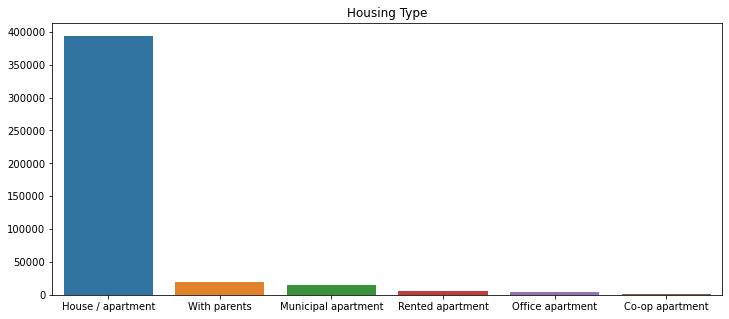

In [547]:
# This graph shows that, majority of applicatant's lives in House / Apartment
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(A['NAME_HOUSING_TYPE'].value_counts().index, A['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('Housing Type')
plt.show()

C:\Users\91973\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


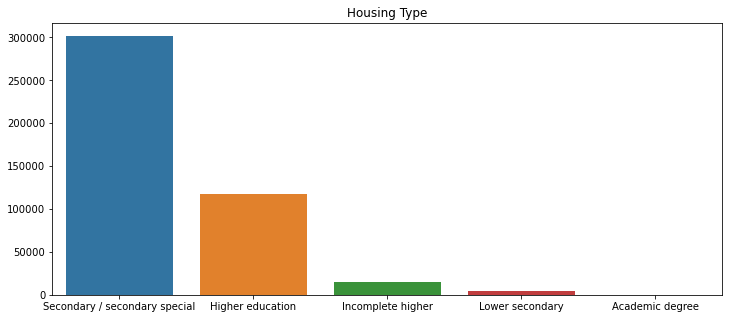

In [548]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(A['NAME_EDUCATION_TYPE'].value_counts().index, A['NAME_EDUCATION_TYPE'].value_counts().values)
plt.title('Housing Type')
plt.show()

In [549]:
A.skew()

ID                  0.212112
CNT_CHILDREN        1.806974
AMT_INCOME_TOTAL    8.835773
DAYS_EMPLOYED       1.739536
FLAG_MOBIL          0.000000
FLAG_WORK_PHONE     1.452886
FLAG_PHONE          0.937611
FLAG_EMAIL          2.522555
CNT_FAM_MEMBERS     0.919715
dtype: float64

# Conclusion
As we have seen that, DecisionTreeClassifier Model is giving highest accuracy of 71.48 %, hence we will use DecisionTreeClassifier model  for predicion